In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob

from tqdm.notebook import tqdm

In [2]:
subset_dataframes = {}

subset_pattern = f"./data/result_*t_vs_*f_3attempts_llama.tsv"
# Get a list of files for the current subset pattern:
subset_files = glob.glob(subset_pattern)
for file_path in subset_files:
    # Extract num_true and num_false from the file name:
    num_true, num_false = map(int, (file_path.split('_')[1][0], file_path.split('_')[3][0]))
    
    df = pd.read_csv(file_path, sep='\t', decimal=",", header=0)
    subset_dataframes[(num_true, num_false)] = df

In [3]:
subset_dataframes[(1, 1)]

,constr,definition,examples,positive_predicted,negative_predicted,true_positives,false_positives,false_negatives,true_negatives,precision,recall,f1,accuracy
0,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...",['Spricht man mit ihm über Igor Setschin und R...,['Spricht man mit ihm über Igor Setschin und R...,"['Noch weiß niemand genau , wie sich aus den i...",[],['Spricht man mit ihm über Igor Setschin und R...,"['Noch weiß niemand genau , wie sich aus den i...",[],0.0,1.0,0.0,0.0
1,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Egal ob Marokko oder Mexiko , Hauptsache , M...","['Egal ob Marokko oder Mexiko , Hauptsache , M...",['Geschweige denn die monatlichen Ausgaben .'],[],"['Egal ob Marokko oder Mexiko , Hauptsache , M...",['Geschweige denn die monatlichen Ausgaben .'],[],0.0,1.0,0.0,0.0
2,10,"Die ""Negation:NEG_XgeschweigedennY-Konstruktio...","['Was der Rausch mit uns macht', 'Der Gutachte...",['Was der Rausch mit uns macht'],['Der Gutachter selbst hat die Tiere allerding...,[],['Was der Rausch mit uns macht'],['Der Gutachter selbst hat die Tiere allerding...,[],0.0,1.0,0.0,0.0
3,100,"Die ""Äquativ_Plural-Konstruktion"" gehört zu de...",['Möglicherweise ist die Öffentlichkeit ähnlic...,['Möglicherweise ist die Öffentlichkeit ähnlic...,['20 Prozent halten die Beziehungen zu beiden ...,[],['Möglicherweise ist die Öffentlichkeit ähnlic...,['20 Prozent halten die Beziehungen zu beiden ...,[],0.0,1.0,0.0,0.0
4,100,"Die ""Äquativ_Plural-Konstruktion"" gehört zu de...",['Wir haben schweizweit eine Patt - Situation ...,['Wir haben schweizweit eine Patt - Situation ...,"['Am Ende werde in meinen Kindern nur Geld , a...",['Wir haben schweizweit eine Patt - Situation ...,[],[],"['Am Ende werde in meinen Kindern nur Geld , a...",1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,98,"Die ""Äquativ:soADJwieXP-Konstruktion"" gehört z...",['Alle im Bundestag vertretenen Parteien begrü...,['Alle im Bundestag vertretenen Parteien begrü...,['Lukas erzählt seine Weihnachtsgeschichte so ...,[],['Alle im Bundestag vertretenen Parteien begrü...,['Lukas erzählt seine Weihnachtsgeschichte so ...,[],0.0,1.0,0.0,0.0
629,98,"Die ""Äquativ:soADJwieXP-Konstruktion"" gehört z...",['Die Ambivalenz der Geschichte müssen die Bet...,['Die Ambivalenz der Geschichte müssen die Bet...,"['"" Wo Hornissen sind , sind keine Wespen . ""']",['Die Ambivalenz der Geschichte müssen die Bet...,[],[],"['"" Wo Hornissen sind , sind keine Wespen . ""']",1.0,1.0,1.0,1.0
630,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...","['Lied zu singen ist fast schwerer als Oper , ...","['Lied zu singen ist fast schwerer als Oper , ...",['Der Dom ist kein Ponyhof'],"['Lied zu singen ist fast schwerer als Oper , ...",[],[],['Der Dom ist kein Ponyhof'],1.0,1.0,1.0,1.0
631,99,"Die ""Komparativ:ADJ-eralsX-Konstruktion"" gehör...",['Auch andere Unternehmen wie Uber kooperieren...,['Auch andere Unternehmen wie Uber kooperieren...,['Sie stürzen sich mit vollem Einsatz in immer...,['Auch andere Unternehmen wie Uber kooperieren...,[],[],['Sie stürzen sich mit vollem Einsatz in immer...,1.0,1.0,1.0,1.0


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

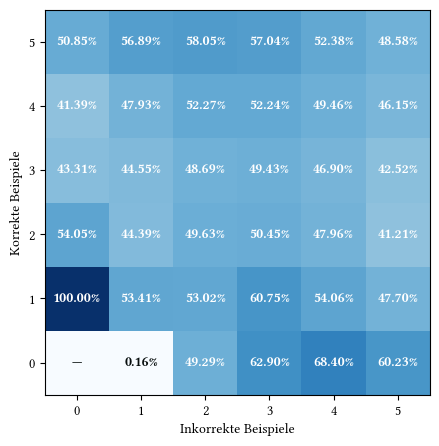

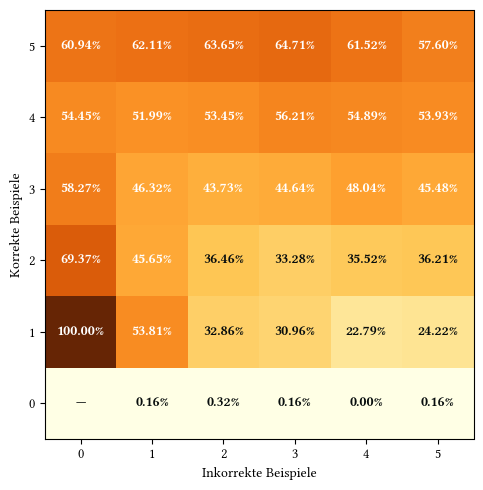

In [4]:
colors_accuracy = "Blues"
colors_f1 = "YlOrBr"
valuefont = {'fontname': 'Libertinus Serif', 'fontweight': 'heavy'}
captionfont = {'fontname': 'Libertinus Serif'}

metrics = [("accuracy", colors_accuracy), ("f1", colors_f1)]

with_zeros = (0, 1) in subset_dataframes.keys() or (1, 0) in subset_dataframes.keys()

# Loop over metrics (accuracy, f1)
for k, (metric, cmap) in enumerate(metrics):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))    
    matrices = []
    for num_true, num_false in tqdm(sorted(subset_dataframes.keys())):
        metric_values = subset_dataframes[(num_true, num_false)][metric].values
        matrices.append(metric_values)
    if with_zeros:
        matrices = [np.zeros_like(matrices[0])] + matrices

    # Create an average matrix
    average_matrix = np.array([np.nanmean(matrix) for matrix in matrices])
    average_matrix = average_matrix.reshape((
        len(set(num_true for num_true, _ in subset_dataframes.keys())),
        len(set(num_false for _, num_false in subset_dataframes.keys()))
    ))
    
    ax.ticklabel_format(useLocale=True)

    ax.imshow(average_matrix, cmap=cmap, vmin=0)
    ax.invert_yaxis()

    for m in range(average_matrix.shape[0]):
        for n in range(average_matrix.shape[1]):
            if with_zeros and m == n == 0:
                ax.text(0, 0, "—", ha='center', va='center', color='xkcd:almost black', **valuefont)
            else:
                value = average_matrix[m, n]
                ax.text(n, m, f"{value:.2%}", ha='center', va='center', color='xkcd:almost black' if value < 0.4 else 'white', **valuefont)

    ax.set_xticks(range(average_matrix.shape[1]))
    ax.set_xticklabels(sorted(set(num_false for _, num_false in subset_dataframes.keys())), **captionfont)

    ax.set_yticks(range(average_matrix.shape[0]))
    ax.set_yticklabels(sorted(set(num_true for num_true, _ in subset_dataframes.keys())), **captionfont)
    ax.set_xlabel("Inkorrekte Beispiele", **captionfont)
    ax.set_ylabel("Korrekte Beispiele", **captionfont)
    #axs[k].set_title(f"Unbekannte Anzahl korrekter Beispiele ({metric.capitalize()})", **captionfont)
    fig.savefig(f"eval_llama_{metric}.pdf", bbox_inches='tight')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()